In [2]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

sns.set_theme(style='white', palette='viridis')
pal = sns.color_palette('viridis')

In [3]:
train = pd.read_csv("train.csv", index_col='id')
test = pd.read_csv("test.csv", index_col='id')
df = train.copy()

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)

# Exploratory Data Analysis

In [90]:
df.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
id,,,,,,,,,,,,,,,,,
0,Male,24.443011,1.699998,81.669950,yes,yes,2.000000,2.983297,Sometimes,no,2.763573,no,0.000000,0.976473,Sometimes,Public_Transportation,Overweight_Level_II
1,Female,18.000000,1.560000,57.000000,yes,yes,2.000000,3.000000,Frequently,no,2.000000,no,1.000000,1.000000,no,Automobile,Normal_Weight
2,Female,18.000000,1.711460,50.165754,yes,yes,1.880534,1.411685,Sometimes,no,1.910378,no,0.866045,1.673584,no,Public_Transportation,Insufficient_Weight
3,Female,20.952737,1.710730,131.274851,yes,yes,3.000000,3.000000,Sometimes,no,1.674061,no,1.467863,0.780199,Sometimes,Public_Transportation,Obesity_Type_III
4,Male,31.641081,1.914186,93.798055,yes,yes,2.679664,1.971472,Sometimes,no,1.979848,no,1.967973,0.931721,Sometimes,Public_Transportation,Overweight_Level_II


#### The attributes related with eating habits
- FAVC : Frequent consumption of high caloric food
- FCVC : Frequency of consumption of vegetables
- NCP : Number of main meals 
- CAEC : Consumption of food between meals 
- CH20 : Consumption of water daily 
- CALC : Consumption of alcohol 
#### The attributes related with the physical condition 
- SCC : Calories consumption monitoring
- FAF : Physical activity frequency 
- TUE : Time using technology devices 
- MTRANS : Transportation used
#### Variables obtained 
- Gender 
- Age
- Height 
- Weight

#### Target 
NObesity values :
- Underweight Less than 18.5
- Normal 18.5 to 24.9
- Overweight 25.0 to 29.9
- Obesity I 30.0 to 34.9
- Obesity II 35.0 to 39.9
- Obesity III Higher than 40

In the dataset, Overweight_Level_I and Overweight_Level_I refer most likely to the general Overweight class in the original dataset, will need to verify later on.

In [91]:
df.describe()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000
mean,23.841804,1.700245,87.887768,2.445908,2.761332,2.029418,0.981747,0.616756
std,5.688072,0.087312,26.379443,0.533218,0.705375,0.608467,0.838302,0.602113
min,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,20.000000,1.631856,66.000000,2.000000,3.000000,1.792022,0.008013,0.000000
50%,22.815416,1.700000,84.064875,2.393837,3.000000,2.000000,1.000000,0.573887
75%,26.000000,1.762887,111.600553,3.000000,3.000000,2.549617,1.587406,1.000000
max,61.000000,1.975663,165.057269,3.000000,4.000000,3.000000,3.000000,2.000000


In [92]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20758 entries, 0 to 20757
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          20758 non-null  object 
 1   Age                             20758 non-null  float64
 2   Height                          20758 non-null  float64
 3   Weight                          20758 non-null  float64
 4   family_history_with_overweight  20758 non-null  object 
 5   FAVC                            20758 non-null  object 
 6   FCVC                            20758 non-null  float64
 7   NCP                             20758 non-null  float64
 8   CAEC                            20758 non-null  object 
 9   SMOKE                           20758 non-null  object 
 10  CH2O                            20758 non-null  float64
 11  SCC                             20758 non-null  object 
 12  FAF                             20758

In [93]:
df.shape

(20758, 17)

## Missing Values

In [94]:
df.isna().mean(axis=0).sort_values(ascending=False)

Gender                            0.0
SMOKE                             0.0
MTRANS                            0.0
CALC                              0.0
TUE                               0.0
FAF                               0.0
SCC                               0.0
CH2O                              0.0
CAEC                              0.0
Age                               0.0
NCP                               0.0
FCVC                              0.0
FAVC                              0.0
family_history_with_overweight    0.0
Weight                            0.0
Height                            0.0
NObeyesdad                        0.0
dtype: float64

- There appears to be no missing values

## Correlation

### Correlation between numerical features

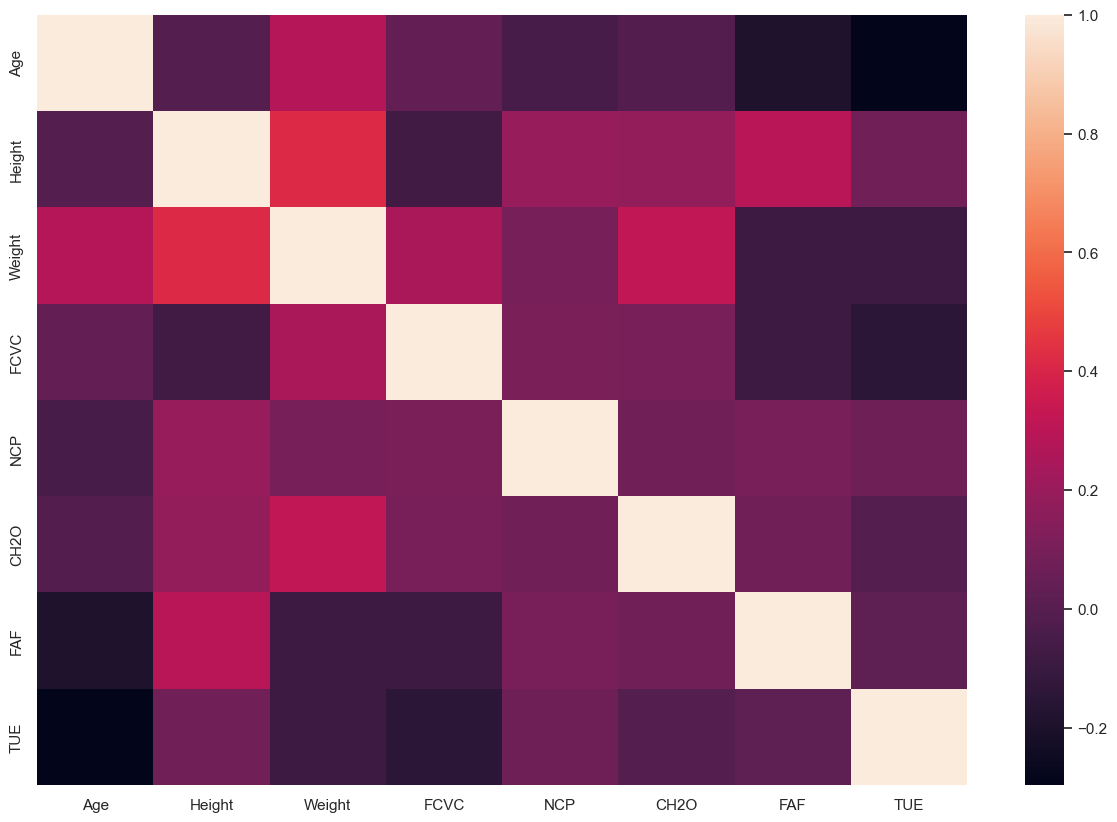

In [95]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(numeric_only=True), annot=False)
plt.show()

In [96]:
correlation_matrix = df.corr(numeric_only=True)

mask = np.triu(np.ones_like(correlation_matrix, dtype=bool), k=1)

most_correlated_pairs = (correlation_matrix.where(mask)
                         .stack()
                         .reset_index()
                         .rename(columns={0: 'Correlation'})
                         .sort_values(by='Correlation', ascending=False))

num_most_correlated = 10
for i, (feature1, feature2, correlation) in enumerate(most_correlated_pairs.head(num_most_correlated).itertuples(index=False), 1):
    print(f"{i}. {feature1} - {feature2}: {correlation:.2f}")


1. Height - Weight: 0.42
2. Weight - CH2O: 0.32
3. Height - FAF: 0.30
4. Age - Weight: 0.28
5. Weight - FCVC: 0.25
6. Height - NCP: 0.19
7. Height - CH2O: 0.18
8. FCVC - NCP: 0.11
9. FCVC - CH2O: 0.10
10. NCP - FAF: 0.10


### Correlation between categorical features

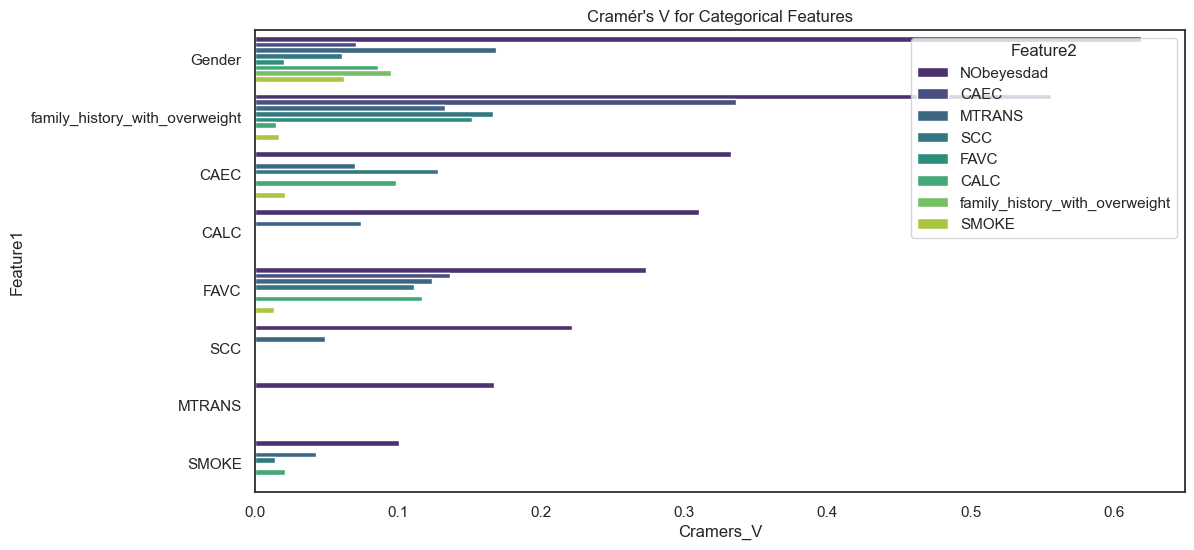

In [97]:
from scipy.stats import chi2_contingency

categorical_features = df.select_dtypes(include=['object'])

cramer_vs_list = []

def cramers_v(confusion_matrix):
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k - 1) * (r - 1)) / (n - 1))
    rcorr = r - ((r - 1) ** 2) / (n - 1)
    kcorr = k - ((k - 1) ** 2) / (n - 1)
    return np.sqrt(phi2corr / min((kcorr - 1), (rcorr - 1)))

for i in range(len(categorical_features.columns) - 1):
    for j in range(i + 1, len(categorical_features.columns)):
        confusion_matrix = pd.crosstab(categorical_features[categorical_features.columns[i]], categorical_features[categorical_features.columns[j]])
        cramer_vs_list.append({'Feature1': categorical_features.columns[i],
                               'Feature2': categorical_features.columns[j],
                               'Cramers_V': cramers_v(confusion_matrix)})

cramer_vs = pd.DataFrame(cramer_vs_list)

cramer_vs = cramer_vs.sort_values(by='Cramers_V', ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x='Cramers_V', y='Feature1', hue='Feature2', data=cramer_vs, palette='viridis')
plt.title(f'Cramér\'s V for Categorical Features')
plt.show()

### Correlation between numerical features and the target

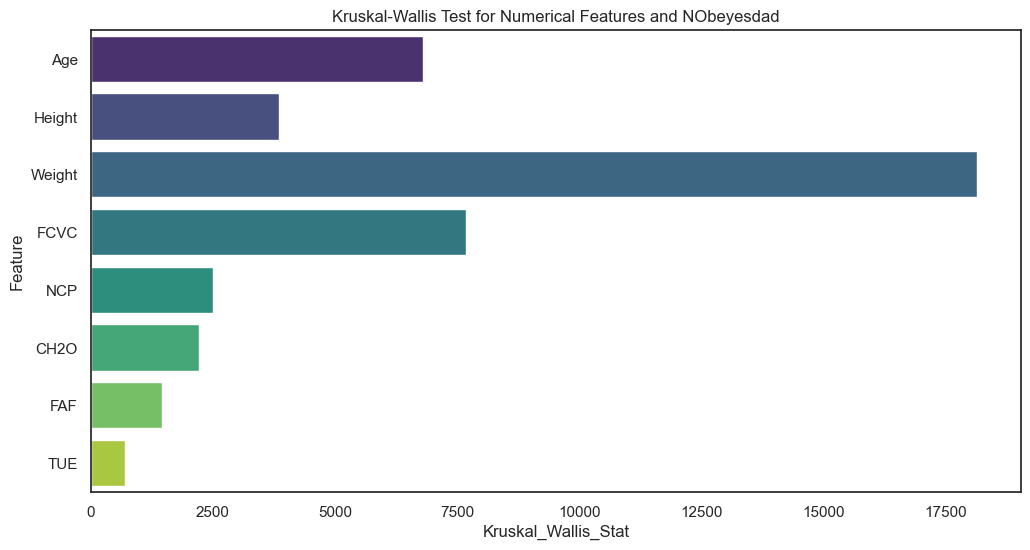

In [98]:
from scipy.stats import kruskal

target_column = 'NObeyesdad'

numerical_features = df.select_dtypes(include=['float64', 'int64'])
target = df[target_column]

kruskal_results = []

for column in numerical_features.columns:
    groups = [group[column] for name, group in numerical_features.groupby(target)]
    stat, p_value = kruskal(*groups)
    kruskal_results.append({'Feature': column, 'Kruskal_Wallis_Stat': stat, 'P_Value': p_value})

kruskal_results_df = pd.DataFrame(kruskal_results)

kruskal_results_df = kruskal_results_df.sort_values(by='P_Value')

plt.figure(figsize=(12, 6))
sns.barplot(x='Kruskal_Wallis_Stat', y='Feature', data=kruskal_results_df, palette='viridis')
plt.title(f'Kruskal-Wallis Test for Numerical Features and {target_column}')
plt.show()


### Correlation between categorical features and the target

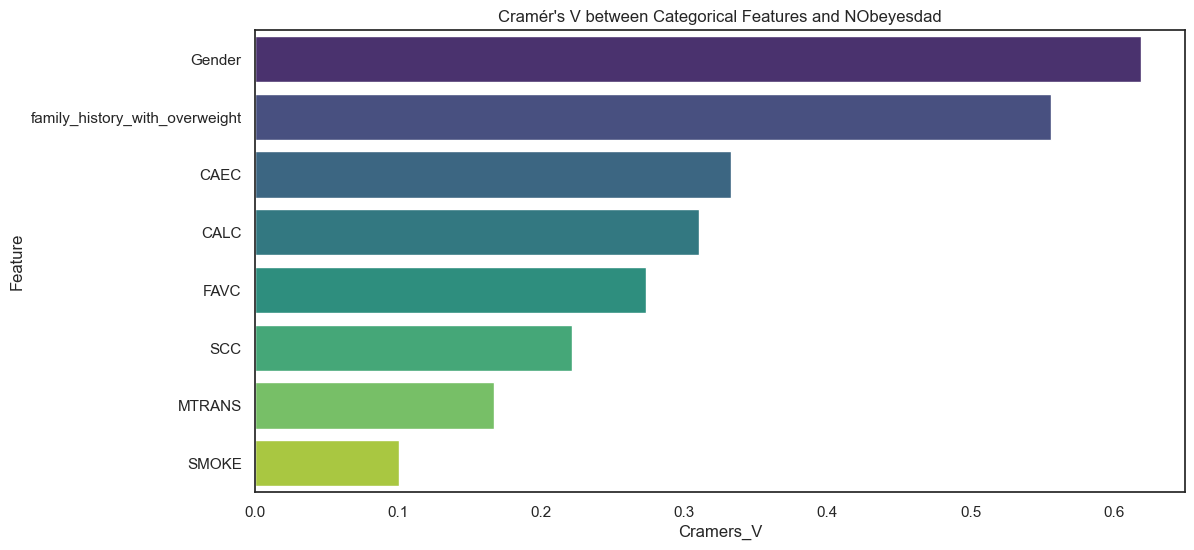

In [99]:
target_column = 'NObeyesdad'

categorical_features = df.select_dtypes(include=['object'])
categorical_features[target_column] = df[target_column]

def cramers_v(confusion_matrix):
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k - 1) * (r - 1)) / (n - 1))
    rcorr = r - ((r - 1) ** 2) / (n - 1)
    kcorr = k - ((k - 1) ** 2) / (n - 1)
    return np.sqrt(phi2corr / min((kcorr - 1), (rcorr - 1)))

cramer_vs = {}
for column in categorical_features.columns[:-1]: 
    confusion_matrix = pd.crosstab(categorical_features[column], categorical_features[target_column])
    cramer_vs[column] = cramers_v(confusion_matrix)

cramer_vs_df = pd.DataFrame(list(cramer_vs.items()), columns=['Feature', 'Cramers_V'])

plt.figure(figsize=(12, 6))
sns.barplot(x='Cramers_V', y='Feature', data=cramer_vs_df.sort_values(by='Cramers_V', ascending=False), palette='viridis')
plt.title(f'Cramér\'s V between Categorical Features and {target_column}')
plt.show()

### More in-depth analysis of the highly correlated features with the target

#### Gender with target

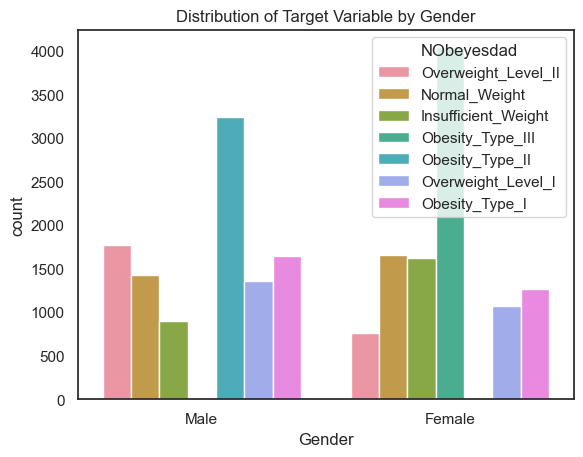

In [100]:
sns.countplot(x='Gender', hue='NObeyesdad', data=df)
plt.title('Distribution of Target Variable by Gender')
plt.show()

#### family_history_with_overweight and target 

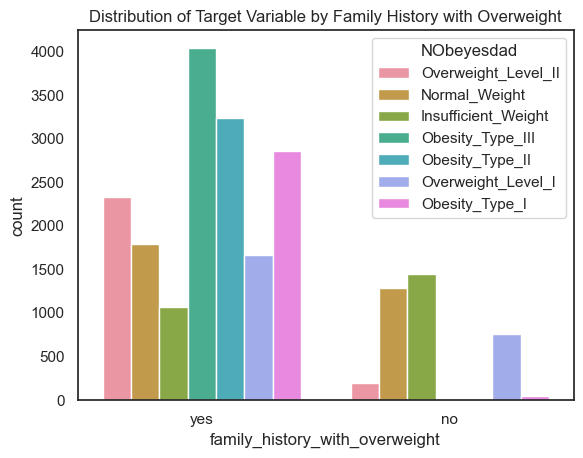

In [101]:
sns.countplot(x='family_history_with_overweight', hue='NObeyesdad', data=df)
plt.title('Distribution of Target Variable by Family History with Overweight')
plt.show()

#### Weight with target

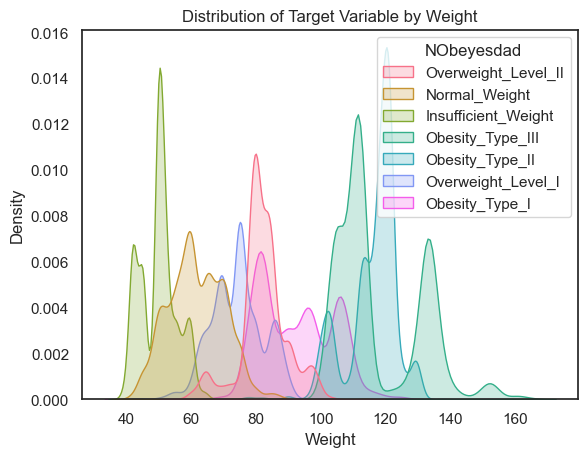

In [102]:
sns.kdeplot(x='Weight', hue='NObeyesdad', data=df, fill=True)
plt.title('Distribution of Target Variable by Weight')
plt.show()

## Target Variable Distribution

In [103]:
df.NObeyesdad.value_counts()

NObeyesdad
Obesity_Type_III       4046
Obesity_Type_II        3248
Normal_Weight          3082
Obesity_Type_I         2910
Insufficient_Weight    2523
Overweight_Level_II    2522
Overweight_Level_I     2427
Name: count, dtype: int64

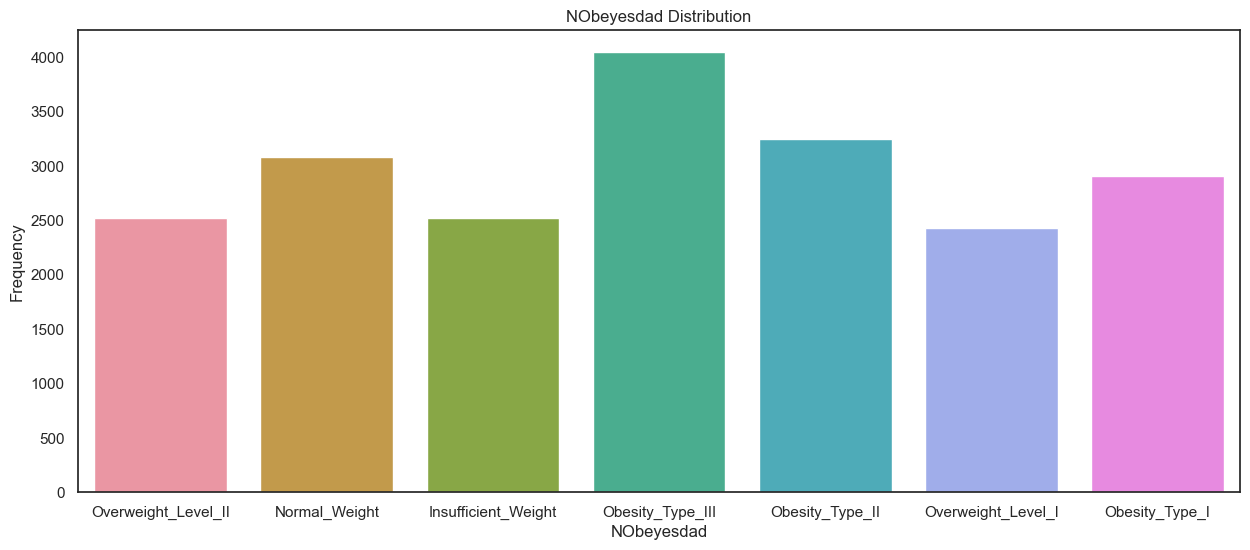

In [104]:
plt.figure(figsize=(15, 6))
sns.countplot(data=df, x=df['NObeyesdad'])
plt.title('NObeyesdad Distribution')
plt.xlabel('NObeyesdad')
plt.ylabel('Frequency')
plt.show()

## Numerical Features Distribution

In [105]:
numerical_features = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

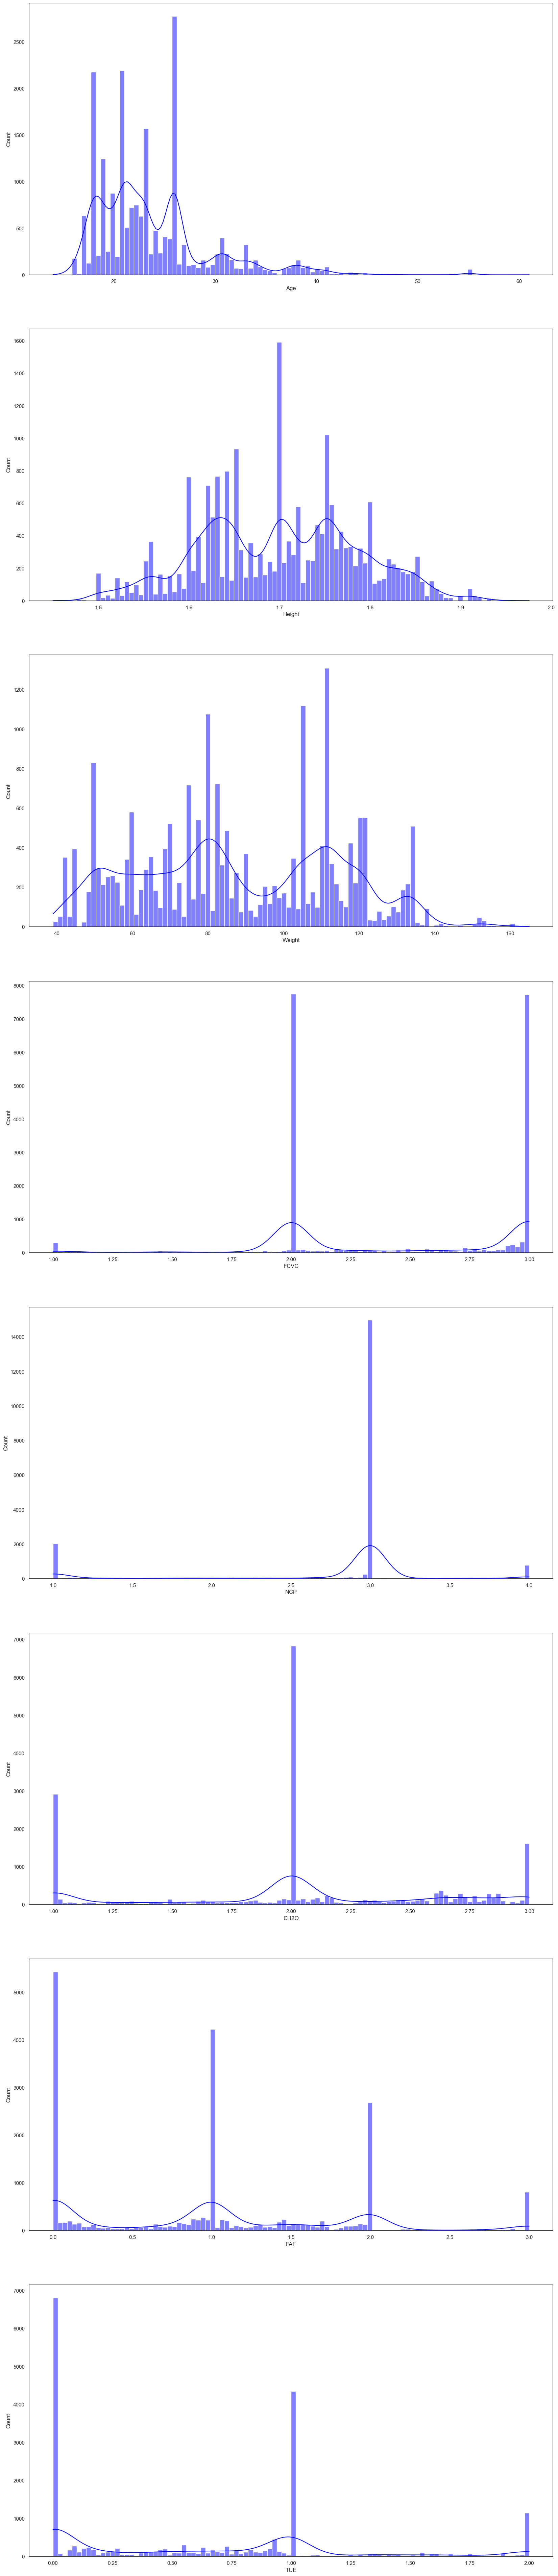

In [106]:
fig, ax = plt.subplots(len(numerical_features),1,  figsize=(20, 40))
plt.subplots_adjust(top = 2)

for index,column in enumerate(numerical_features):
    sns.histplot(df[column], color='b', bins=100, ax=ax[index], kde=True);

- Some features like FCVC, NCP, CH20, FAF, TUE follow a distribution similar to a category 
- The other features might need to be normalized

In [16]:
feature = df['FAF']

# Calculate quartiles
Q1 = np.percentile(feature, 25)
Q3 = np.percentile(feature, 75)

# Calculate IQR
IQR = Q3 - Q1

# Calculate lower and upper bounds
lower_bound = Q1 - (1.5 * IQR)
upper_bound = Q3 + (1.5 * IQR)

# Identify outliers
outliers = feature[(feature < lower_bound) | (feature > upper_bound)]

In [17]:
outliers

Series([], Name: FAF, dtype: float64)

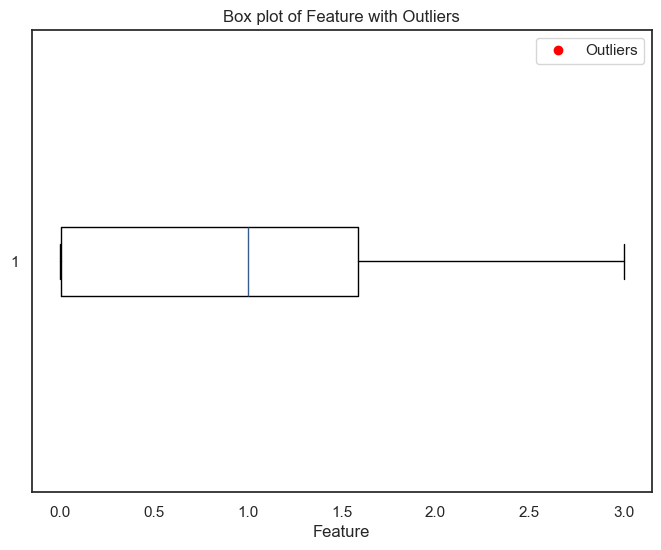

In [18]:
plt.figure(figsize=(8, 6))
plt.boxplot(feature, vert=False)
plt.plot(outliers, [1] * len(outliers), 'ro', label='Outliers')
plt.xlabel('Feature')
plt.title('Box plot of Feature with Outliers')
plt.legend()
plt.show()

## Categorical Features Distribution

In [107]:
categorical_features = df.select_dtypes(include=['object', 'category']).columns.tolist()

In [108]:
categorical_features.remove('NObeyesdad')

In [109]:
df.select_dtypes(include=['object']).nunique()

Gender                            2
family_history_with_overweight    2
FAVC                              2
CAEC                              4
SMOKE                             2
SCC                               2
CALC                              3
MTRANS                            5
NObeyesdad                        7
dtype: int64

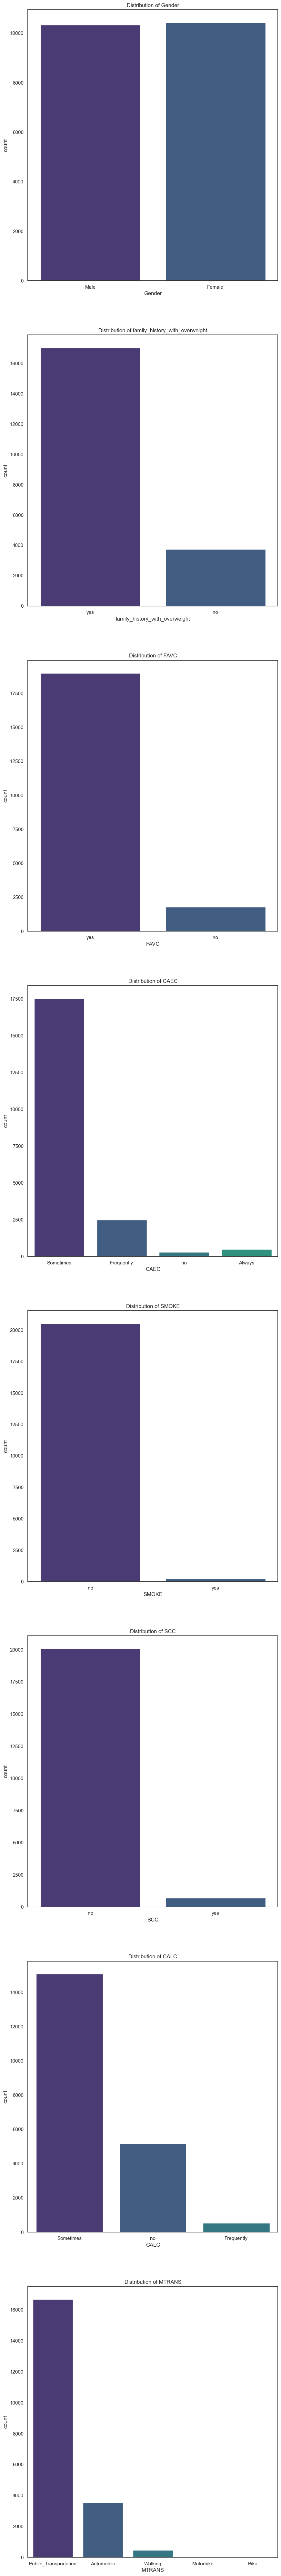

In [110]:
fig, axes = plt.subplots(len(categorical_features), 1, figsize=(10, 10))
plt.subplots_adjust(top=8)

for index, column in enumerate(categorical_features):
    sns.countplot(data=df, x=column, ax=axes[index])
    axes[index].set_title(f'Distribution of {column}')

plt.show()

## Adversarial Validation

In [111]:
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import make_pipeline
from sklearn.metrics import roc_auc_score, roc_curve
from xgboost import XGBClassifier

In [112]:
def adversarial_validation(dataset_1 = train, dataset_2 = test, label = 'Train-Test'):

    adv_train = dataset_1.drop('NObeyesdad', axis = 1)
    adv_test = dataset_2.copy()

    adv_train['is_test'] = 0
    adv_test['is_test'] = 1

    adv = pd.concat([adv_train, adv_test], ignore_index = True)

    adv_shuffled = adv.sample(frac = 1)

    adv_X = adv_shuffled.drop('is_test', axis = 1)
    adv_y = adv_shuffled.is_test

    skf = StratifiedKFold(n_splits = 5, random_state = 42, shuffle = True)

    val_scores = []
    predictions = np.zeros(len(adv))

    for fold, (train_idx, val_idx) in enumerate(skf.split(adv_X, adv_y)):
    
        adv_lr = make_pipeline(OneHotEncoder(handle_unknown='ignore'), XGBClassifier(random_state = 42))
        adv_lr.fit(adv_X.iloc[train_idx], adv_y.iloc[train_idx])
        
        val_preds = adv_lr.predict_proba(adv_X.iloc[val_idx])[:,1]
        predictions[val_idx] = val_preds
        val_score = roc_auc_score(adv_y.iloc[val_idx], val_preds)
        val_scores.append(val_score)
    
    fpr, tpr, _ = roc_curve(adv['is_test'], predictions)
    
    plt.figure(figsize = (10, 10), dpi = 300)
    sns.lineplot(x=[0, 1], y=[0, 1], linestyle="--", label="Indistinguishable Datasets")
    sns.lineplot(x=fpr, y=tpr, label="Adversarial Validation Classifier")
    plt.title(f'{label} Validation = {np.mean(val_scores):.5f}', weight = 'bold', size = 17)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.show()

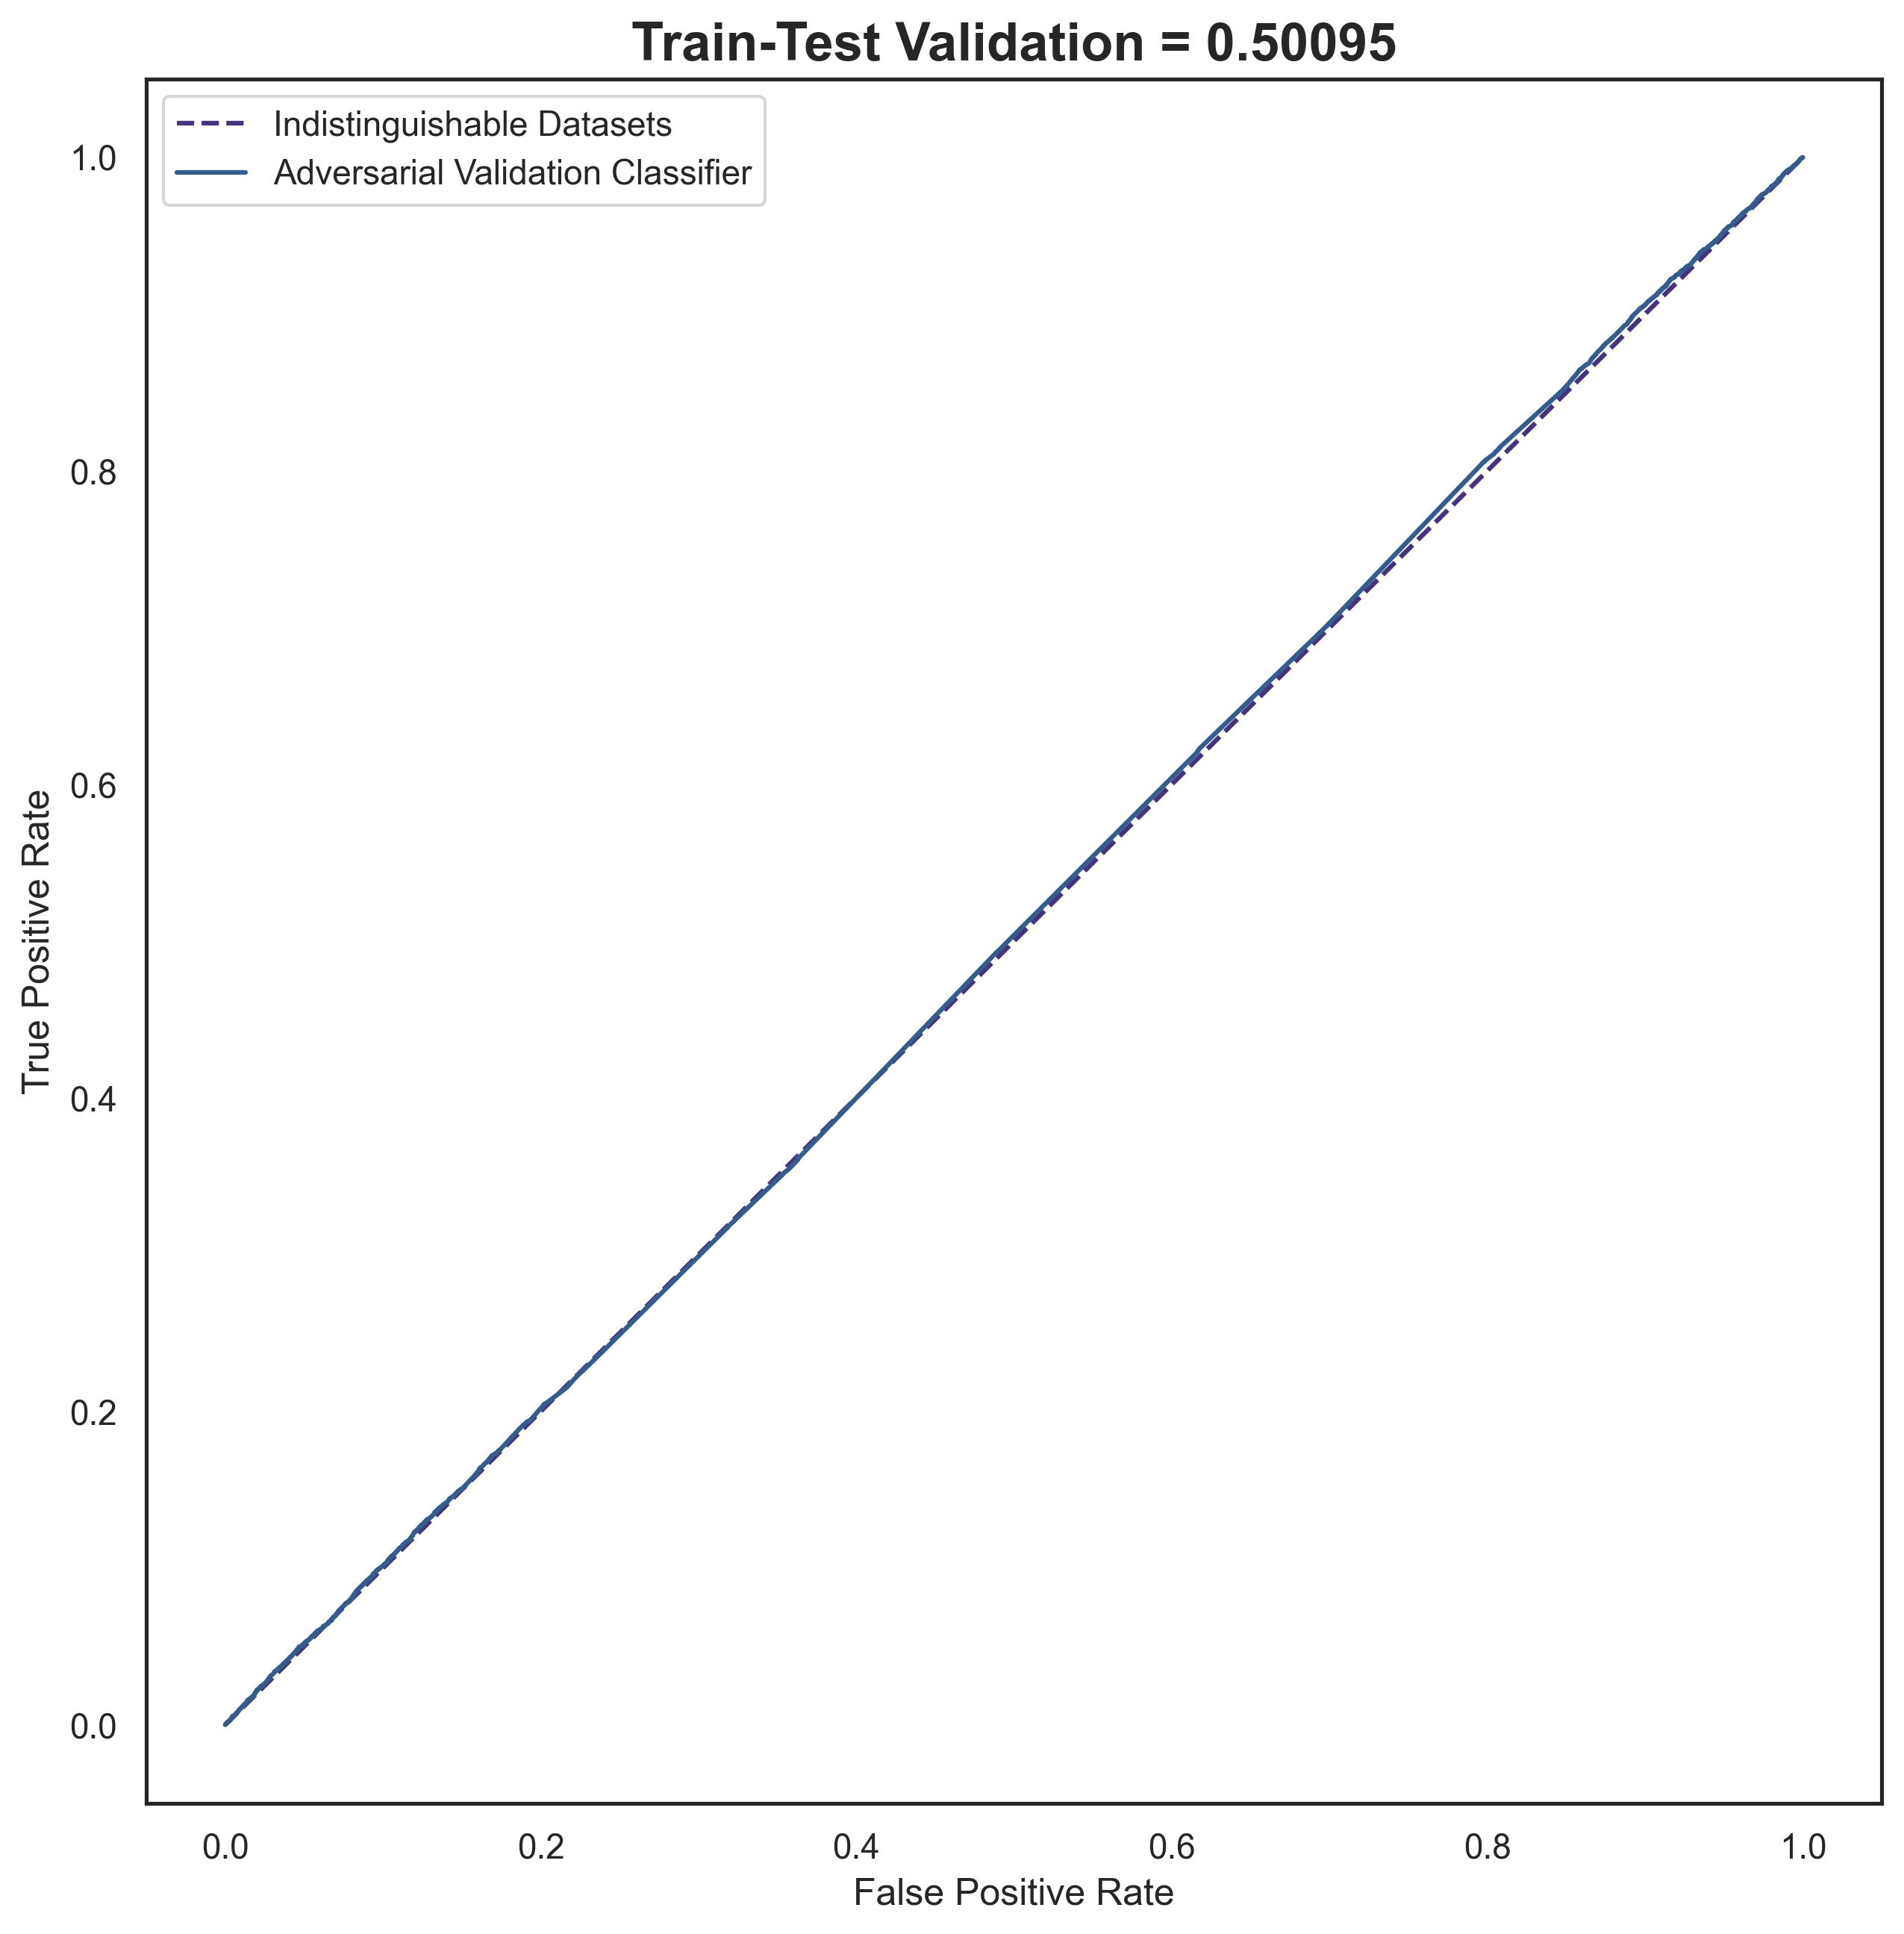

In [113]:
adversarial_validation()